In [2]:
# -*- coding: utf-8 -*-
"""
Created on Sat Mar 28 15:34:07 2020

@author: ecen
"""


import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from pandas import DataFrame
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes
import json

dataset= pd.read_csv('Data_SDP_categorical.csv',header =0, index_col=0,parse_dates=True, squeeze=True)


print(dataset[['Length']].describe())

# Copying dataset
dataset_new = dataset.copy()
# Creating length intervals 
dataset['Length_Intervals'] = pd.cut(dataset['Length'], [0, 100,200,300,400,500,600,700,800,900,1000,1100,1200,1300], 
                              labels=['0-100', '100-200', '200-300', '300-400','400-500','500-600','600-700', 
                                      '700-800','800-900','900-1000','1000-1100','1100-1200','1200-1300'])




# creating time intervals
f = 300
a = 0
b = 12600
bins = [x * f for x in range(a, b)]
dataset['Time_Intervals'] = pd.cut(x=dataset['Time'], bins=bins)

dataset = dataset.drop('Time',axis=1)
dataset  = dataset.drop('Length',axis = 1)


# file_Length = dataset[['Length_Intervals']]
# file_Time = dataset[['Time_Intervals']]

file_Time = dataset[['Time_Intervals']]
# file_Time = pd.get_dummies(dataset[['Time_Intervals']])
file_Source = pd.get_dummies(dataset_new[['Source']])
file_Destination = pd.get_dummies(dataset_new[['Destination']])
file_Protocol = pd.get_dummies(dataset_new[['Protocol']])
file_Messages = pd.get_dummies(dataset_new[['Messages']])
# file_Length = pd.get_dummies(dataset[['Length_Intervals']])
file_Length_small = dataset[['Length_Intervals']]
#This concats the two seperate dataframes
Binary_ip = pd.concat([file_Source, file_Destination], axis=1)


#this removes duplicate columns
Binary_ip = Binary_ip.loc[:,~Binary_ip.columns.duplicated()]

#This concats all the dataframes we have created
Finalized_Data = pd.concat([file_Time, file_Length_small,Binary_ip,file_Protocol,file_Messages], axis=1)

# Dropping NaNs 
# Finalized_Data.replace([np.inf, -np.inf], np.nan)
Finalized_Data = Finalized_Data.dropna()
Finalized_Data = Finalized_Data.reset_index(drop=True)


Finalized_Data

Using TensorFlow backend.


              Length
count  248069.000000
mean      256.959217
std       237.302632
min        42.000000
25%        60.000000
50%       187.000000
75%       381.000000
max      1286.000000


Time_Intervals Length_Intervals  Source_10.10.10.21  \
0             (0, 300]          100-200                   0   
1             (0, 300]            0-100                   0   
2             (0, 300]          200-300                   0   
3             (0, 300]          100-200                   0   
4             (0, 300]          100-200                   0   
...                ...              ...                 ...   
248063  (12000, 12300]            0-100                   0   
248064  (12000, 12300]            0-100                   0   
248065  (12000, 12300]            0-100                   0   
248066  (12300, 12600]            0-100                   0   
248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  ...  Protocol_BACnet-NPDU  Messages_Ack-Message  \
0                        0  ...                     0                     0   
1                        0  ...                     0                     0   
2                        0  ...                     0                     0   
3                        0  ...                     0                     0   
4                        1  ...                     0                     0   
...                    ...  ...                   ...                   ...   
248063                   0  ...                     0                     0   
248064                   0  ...                     0                     0   
248065                   0  ...                     0                     0   
248066                   0  ...                     0                     0   
248067                   0  ...                     0                     0   

        Messages_At  Messages_I-Am  Messages_Read-Property  Messages_Tell  \
0                 0              0                       1              0   
1                 0              0                       0              1   
2                 0              0                       1              0   
3                 0              0                       1              0   
4                 0              0                       1              0   
...             ...            ...                     ...            ...   
248063            1              0                       0              0   
2480

In [5]:
Dataframe = pd.read_csv('Data_SDP_categorical.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
Dataframe3 = pd.read_csv('Data_SDP_categorical.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

#Extracting source and destination columns and storing into list
Source = Dataframe['Source'].to_list()
Destination = Dataframe['Destination'].to_list()


column = []
for col in Dataframe.columns:
    column.append(col)
    
dict_NonIP ={
    'CeLink_11:a6:33': '192.168.1.30',
    'Cisco_0f:06:41': '192.168.1.31', 
    'Cisco_9f:f0:0a': '192.168.1.32',
    'Dell_25:9a:40': '192.168.1.33',
    'HewlettP_13:75:02': '192.168.1.34',
    'Honeywel_10:2c:96': '192.168.1.35',
    'Honeywel_10:2d:00': '192.168.1.36',
    'Honeywel_10:2d:a5': '192.168.1.37',
    'Honeywel_10:2d:bb': '192.168.1.38',
    'Honeywel_10:2d:da': '192.168.1.39',
    'Honeywel_10:2d:dd': '192.168.1.40',
    'Honeywel_10:2d:e2': '192.168.1.41',
    'Honeywel_10:2d:e7': '192.168.1.42',
    'Honeywel_10:2d:ea': '192.168.1.43',
    'Honeywel_10:2e:0d': '192.168.1.44',
    'Honeywel_10:2e:13': '192.168.1.45',
    'Honeywel_10:30:81': '192.168.1.46',
    'Honeywel_10:30:bc': '192.168.1.47',
    'Honeywel_10:31:2a': '192.168.1.48',
    'Honeywel_10:32:cc': '192.168.1.49',
    'Honeywel_10:3b:65': '192.168.1.50',
    'Invensys_05:6e:9a': '192.168.1.51',
    'JohnsonC_04:e3:36': '192.168.1.52',
    'JohnsonC_04:e3:37': '192.168.1.53',
    'Raspberr_03:11:98': '192.168.1.54',
    'Raspberr_03:32:a7': '192.168.1.55',
    'Raspberr_05:6c:3b': '192.168.1.56',
    'Raspberr_1d:e4:ca': '192.168.1.57',
    'Raspberr_1f:3c:45': '192.168.1.58',
    'Raspberr_20:d7:8b': '192.168.1.59',
    'Raspberr_36:27:c5': '192.168.1.60',
    'Raspberr_46:d2:6c': '192.168.1.61',
    'Raspberr_aa:e0:a9': '192.168.1.62',
    'Raspberr_ac:c3:5f': '192.168.1.63',
    'Raspberr_c0:eb:3b': '192.168.1.64',
    'Raspberr_dc:99:3a': '192.168.1.65',
    'Raspberr_e2:d4:19': '192.168.1.66',
    'Raspberr_ed:6f:72': '192.168.1.67',
    'Raspberr_f0:fa:e2': '192.168.1.68',
    'Raspberr_fe:f4:e6': '192.168.1.69',
    'Tridium_8c:89:22': '192.168.1.70',
    'Tridium_8c:b4:78': '192.168.1.71', 
    'Tridium_8c:b4:84': '192.168.1.72',
    'Tridium_8c:b4:8e': '192.168.1.73',
    'Tridium_8c:b5:e2': '192.168.1.74',
    'Broadcast': '1.1.1.1',    
    }

Source[:]=[dict_NonIP.get(e,e) for e in Source]
Destination[:]=[dict_NonIP.get(e,e) for e in Destination]



#Source_extraction = []
#Splitting the IP address after a full stop
#for i in Source:
#    x = i.split('')
#    Source_extraction.append(x)

#Dest_extraction = []
#Splitting the IP address after a full stop
#for i in Destination:
#    x = i.split('.')
#    Dest_extraction.append(x)


Source_bin = []
Dest_bin = []

for i in Source:
    ip = ''.join([bin(int(x)+256)[3:] for x in i.split('.')])
    Source_bin.append(ip)


for i in Destination:
    ip = ''.join([bin(int(x)+256)[3:] for x in i.split('.')])
    Dest_bin.append(ip)
    
Source_binary = pd.DataFrame(Source_bin)
Source_binary = Source_binary.rename(columns={0: 'Source'})
Source_binary = Source_binary['Source'].apply(lambda x: pd.Series(list(x)))
                           
Destination_binary = pd.DataFrame(Dest_bin)
Destination_binary = Destination_binary.rename(columns={0: 'Destination'})
Destination_binary = Destination_binary['Destination'].apply(lambda x: pd.Series(list(x)))

IP_binary = pd.concat([Source_binary, Destination_binary], axis=1)


a = Source_binary.columns[np.arange(0,32)]
b = ['bit' + str(i) for i in np.arange(1,len(a)+1)]
d = dict(zip(a, b))
e = dict(zip(a, b))

Source_binary = Source_binary.rename(columns=e)
Destination_binary = Destination_binary.rename(columns=d)

 
IP_binary = pd.concat([Source_binary, Destination_binary], axis=1)   


file_Time = Dataframe.loc[:, "Time"]
file_Protocol = Dataframe.loc[:, "Protocol"]
file_Msg = Dataframe.loc[:, "Messages"]


Binary_Protocol = pd.get_dummies(file_Protocol)
Protocol = file_Protocol.to_frame()

Binary_Message = pd.get_dummies(file_Msg)
Msg = file_Msg.to_frame()


IP_binary = pd.concat([Source_binary, Destination_binary], axis=1)  
Time_Interval = file_Time.to_frame()
Protocol = file_Protocol.to_frame()
Msg = file_Msg.to_frame()


#k-modes
processeddata = pd.concat([Time_Interval, IP_binary, Protocol, Msg], axis=1)

#Creating a dictionary of unique IP values

IP_join = Source + Destination

IP_join = list(dict.fromkeys(IP_join))

IP_extraction = []

for i in IP_join:
    ip = ''.join([bin(int(x)+256)[3:] for x in i.split('.')])
    IP_extraction.append(ip)

dict_IP_all = dict(zip(IP_join, IP_extraction))



In [7]:
processeddata

Time bit1 bit2 bit3 bit4 bit5 bit6 bit7 bit8 bit9  ... bit25  \
0           0.000000    0    0    0    0    1    0    1    0    0  ...     0   
1           0.022244    0    0    0    0    1    0    1    0    0  ...     0   
2           0.036096    1    1    0    0    0    0    0    0    1  ...     0   
3           0.038743    0    0    0    0    1    0    1    0    0  ...     0   
4           0.098198    0    0    0    0    1    0    1    0    0  ...     0   
...              ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   
248064  12290.077540    1    1    0    0    0    0    0    0    1  ...     0   
248065  12290.307860    1    1    0    0    0    0    0    0    1  ...     0   
248066  12290.307870    1    1    0    0    0    0    0    0    1  ...     0   
248067  12315.565550    1    1    0    0    0    0    0    0    1  ...     0   
248068  12315.566530    1    1    0    0    0    0    0    0    1  ...     0   

       bit26 bit27 bit28 bit29 bit30 bit31 bit32     Protocol       Messages  
0          0     0     0     1     1     0     0  BACnet-APDU  Read-Property  
1          0     1     0     1     1     0     0  BACnet-APDU  Read-Property  
2          0     0     0     0     0     0     1          ARP           Tell  
3          0     0     0     1     1     0     0  BACnet-APDU  Read-Property  
4          0     1     1     1     1     0     1  BACnet-APDU  Read-Property  
...      ...   ...   ...   ...   ...   ...   ...          ...            ...  
248064     0     0     1     1     1     1     0          ARP             At  
248065     0     0     1     1     1     1     0          ARP           Tell  
248066     0     1     1     1     0     1     0          ARP             At  
248067     0     1     1     1     0     1     0          ARP           Tell  
248068     0     0     1     1     1     1     0          ARP             At  

[248069 rows x 67 columns]

In [12]:
processeddata.iloc[:,1:65]

bit1 bit2 bit3 bit4 bit5 bit6 bit7 bit8 bit9 bit10  ... bit23 bit24  \
0         0    0    0    0    1    0    1    0    0     0  ...     1     0   
1         0    0    0    0    1    0    1    0    0     0  ...     1     0   
2         1    1    0    0    0    0    0    0    1     0  ...     0     1   
3         0    0    0    0    1    0    1    0    0     0  ...     1     0   
4         0    0    0    0    1    0    1    0    0     0  ...     1     0   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   ...   ...   
248064    1    1    0    0    0    0    0    0    1     0  ...     0     1   
248065    1    1    0    0    0    0    0    0    1     0  ...     0     1   
248066    1    1    0    0    0    0    0    0    1     0  ...     0     1   
248067    1    1    0    0    0    0    0    0    1     0  ...     0     1   
248068    1    1    0    0    0    0    0    0    1     0  ...     0     1   

       bit25 bit26 bit27 bit28 bit29 bit30 bit31 bit32  
0          0     0     0     0     1     1     0     0  
1          0     0     1     0     1     1     0     0  
2          0     0     0     0     0     0     0     1  
3          0     0     0     0     1     1     0     0  
4          0     0     1     1     1     1     0     1  
...      ...   ...   ...   ...   ...   ...   ...   ...  
248064     0     0     0     1     1     1     1     0  
248065     0     0     0     1     1     1     1     0  
248066     0     0     1     1     1     0     1     0  
248067     0     0     1     1     1     0     1     0  
248068     0     0     0     1     1     1     1     0  

[248069 rows x 64 columns]

In [13]:
file_Protocol = pd.get_dummies(processeddata[['Protocol']])
file_Messages = pd.get_dummies(processeddata[['Messages']])
#This concats all the dataframes we have created
Finalized_Data = pd.concat([processeddata.iloc[:,1:65], file_Protocol,file_Messages], axis=1)

# Dropping NaNs 
# Finalized_Data.replace([np.inf, -np.inf], np.nan)
Finalized_Data = Finalized_Data.dropna()
Finalized_Data = Finalized_Data.reset_index(drop=True)

In [14]:
Finalized_Data

bit1 bit2 bit3 bit4 bit5 bit6 bit7 bit8 bit9 bit10  ...  \
0         0    0    0    0    1    0    1    0    0     0  ...   
1         0    0    0    0    1    0    1    0    0     0  ...   
2         1    1    0    0    0    0    0    0    1     0  ...   
3         0    0    0    0    1    0    1    0    0     0  ...   
4         0    0    0    0    1    0    1    0    0     0  ...   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
248064    1    1    0    0    0    0    0    0    1     0  ...   
248065    1    1    0    0    0    0    0    0    1     0  ...   
248066    1    1    0    0    0    0    0    0    1     0  ...   
248067    1    1    0    0    0    0    0    0    1     0  ...   
248068    1    1    0    0    0    0    0    0    1     0  ...   

       Protocol_BACnet-NPDU Messages_Ack-Message Messages_At Messages_I-Am  \
0                         0                    0           0             0   
1                         0                    0           0             0   
2                         0                    0           0             0   
3                         0                    0           0             0   
4                         0                    0           0             0   
...                     ...                  ...         ...           ...   
248064                    0                    0           1             0   
248065                    0                    0           0             0   
248066                    0                    0           1             0   
248067                    0                    0           0             0   
248068                    0                    0           1             0   

       Messages_Read-Property Messages_Tell Messages_Unconfirmed-Transfer  \
0                           1             0                             0   
1                           1             0                             0   
2                           0             1                             0   
3                           1             0                             0   
4                           1             0                             0   
...                       ...           ...                           ...   
248064                      0             0                             0   
248065                      0             1                             0   
248066                      0             0                             0   
248067                      0             1                             0   
248068                      0             0                             0   

       Messages_Who-Is Messages_Who-Router Messages_Write-Property  
0                    0                   0                       0  
1                    0                   0                       0  
2                    0                   0                       0  
3                    0                   0                       0  
4                    0                   0                       0  
...                ...                 ...                     ...  
248064               0                   0                       0  
248065               0                   0                       0  
248066               0                   0                       0  
248067               0                   0                       0  
248068               0                   0                       0  

[248069 rows x 76 columns]

#### This notebook is for preprocessing the data. We convert some of the non-ip addresses into ip addresses and then we eventually convert them into bits

In [ ]:
import json

with open('dict_ip_all.json', 'w') as f:
    json.dump(dict_IP_all, f)

#with open('dict_IP_all') as f:
    my_dict = json.load(f)

with open('dict_non_ip.json', 'w') as f:
    json.dump(dict_NonIP, f)

with open('dict_bitslabelpart1.json', 'w') as f:
    json.dump(e, f)

with open('dict_bitslabelpart2', 'w') as f:
    json.dump(d, f)

with open('dict_msg.json', 'w') as f:
    json.dump(dict_msg, f)

with open('dict_protocol.json', 'w') as f:
    json.dump(dict_protocol, f)


In [52]:
pd.set_option('display.max_columns',227)
pd.set_option('display.max_rows',24000)

In [17]:
Finalized_Data

Time_Intervals Length_Intervals  Source_10.10.10.21  \
0             (0, 300]          100-200                   0   
1             (0, 300]            0-100                   0   
2             (0, 300]          200-300                   0   
3             (0, 300]          100-200                   0   
4             (0, 300]          100-200                   0   
...                ...              ...                 ...   
248063  (12000, 12300]            0-100                   0   
248064  (12000, 12300]            0-100                   0   
248065  (12000, 12300]            0-100                   0   
248066  (12300, 12600]            0-100                   0   
248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0  

In [ ]:
# Finding the best number of clusters using the silhouette method

### Code for the silhouette plot
for n_clusters in range(2,15):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KModes(n_clusters=n_clusters,init = 'Cao',random_state=10,verbose = 1)
    cluster_labels = clusterer.fit_predict(x)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(x[:, 0], x[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centroids_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()



Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1167167.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 30581, cost: 975928.0
Run 1, iteration: 2/100, moves: 52266, cost: 972543.0
Run 1, iteration: 3/100, moves: 599, cost: 972543.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 83697, cost: 872731.0
Run 1, iteration: 2/100, moves: 1421, cost: 872731.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 26909, cost: 851353.0
Run 1, iteration: 2/100, moves: 190, cost: 851353.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 34301, cost: 877250.0
Run 1, iteration: 2/100, moves: 67890, cost: 855154.0
Run 1, iteration: 3/100, moves: 5331, cost: 849907.0
Run 1, iteratio

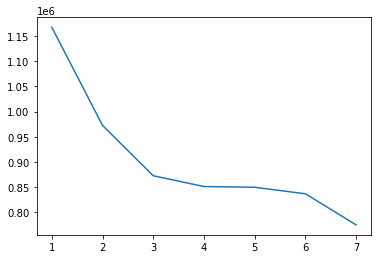

In [6]:
# Finding the best number of clusters by obtaining cost (elbow method)
cost = []
for num_clusters in list(range(1,8)):
    kmode = KModes(n_clusters=num_clusters, init = 'Huang', n_init = 1, verbose=1)
    kmode.fit_predict(Finalized_Data)
    cost.append(kmode.cost_)

# categorical = [x for x in range(1,240)]


# cost = []
# X = Finalized_Data

# for num_clusters in list(range(2,8)):
    
#     kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=10,n_init=50) 
#     kproto.fit_predict(X, categorical=categorical) #indices of columns that contain categorical data
#     cost.append(kproto.cost_)


y = np.array([i for i in range(1,8,1)])
plt.plot(y,cost)

In [45]:
# get an array of cluster modes
kmodes = kmode.cluster_centroids_
shape = kmodes.shape
shape

(7, 227)

In [ ]:
clusterCentroidsDf.columns = Finalized_Data.columns

clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([Finalized_Data, clustersDf], axis = 1).reset_index()
combinedDf.drop('index',axis=1)
combinedDf.drop('index',axis=1)

In [10]:
for i in range(shape[0]):
    if sum(kmodes[i,:]) == 0:
        print("\ncluster " + str(i) + ": ")
        print("no-skills cluster")
    else:
        print("\ncluster " + str(i) + ": ")
        cent = kmodes[i,:]
        for j in Finalized_Data.columns[np.nonzero(cent)]:
            print(j)

TypeError: unsupported operand type(s) for +: 'pandas._libs.interval.Interval' and 'str'

In [39]:
kmode.cluster_centroids_

array([[Interval(6600, 6900, closed='right'), '100-200', 0, ..., 0, 0, 0],
       [Interval(1200, 1500, closed='right'), '500-600', 0, ..., 0, 0, 0],
       [Interval(2400, 2700, closed='right'), '0-100', 0, ..., 0, 0, 0],
       ...,
       [Interval(4200, 4500, closed='right'), '0-100', 0, ..., 0, 0, 0],
       [Interval(2700, 3000, closed='right'), '500-600', 0, ..., 0, 0, 0],
       [Interval(4800, 5100, closed='right'), '0-100', 0, ..., 0, 0, 0]],
      dtype=object)

### Choosing clusters to be 5

In [43]:
Finalized_Data

Time_Intervals Length_Intervals  Source_10.10.10.21  \
0             (0, 300]          100-200                   0   
1             (0, 300]            0-100                   0   
2             (0, 300]          200-300                   0   
3             (0, 300]          100-200                   0   
4             (0, 300]          100-200                   0   
...                ...              ...                 ...   
248063  (12000, 12300]            0-100                   0   
248064  (12000, 12300]            0-100                   0   
248065  (12000, 12300]            0-100                   0   
248066  (12300, 12600]            0-100                   0   
248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0  

In [44]:
km_cao = KModes(n_clusters=5, init = "Cao", n_init = 1, verbose=1,random_state=22)
fitClusters_cao = km_cao.fit_predict(Finalized_Data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 75681, cost: 749554.0
Run 1, iteration: 2/100, moves: 2544, cost: 749554.0


In [46]:
km_cao_10 = KModes(n_clusters=10, init = "Cao", n_init = 1, verbose=1,random_state=22)
fitClusters_cao_10 = km_cao_10.fit_predict(Finalized_Data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25011, cost: 660037.0
Run 1, iteration: 2/100, moves: 1014, cost: 659303.0
Run 1, iteration: 3/100, moves: 526, cost: 659303.0


In [48]:
clusterCentroidDf = pd.DataFrame(km_cao.cluster_centroids_)

In [49]:
clusterCentroidDf

0        1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18  \
0  (6900, 7200]  100-200  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
1  (6900, 7200]    0-100  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
2  (2400, 2700]    0-100  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  (3300, 3600]    0-100  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0   
4  (4200, 4500]  200-300  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

  19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43  \
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

  44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68  \
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

  69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93  \
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   
4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0   

  94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113  \
0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   

  133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
2   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   
4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

  171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189  \
0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  

In [71]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([Finalized_Data, clustersDf], axis = 1).reset_index()
combinedDf.drop('index',axis=1)
combinedDf

index  Time_Intervals Length_Intervals  Source_10.10.10.21  \
0            0        (0, 300]          100-200                   0   
1            1        (0, 300]            0-100                   0   
2            2        (0, 300]          200-300                   0   
3            3        (0, 300]          100-200                   0   
4            4        (0, 300]          100-200                   0   
...        ...             ...              ...                 ...   
248063  248063  (12000, 12300]            0-100                   0   
248064  248064  (12000, 12300]            0-100                   0   
248065  248065  (12000, 12300]            0-100                   0   
248066  248066  (12300, 12600]            0-100                   0   
248067  248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248

In [56]:
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]
cluster_4 = combinedDf[combinedDf['cluster_predicted'] == 4]



In [101]:
cluster_2.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25251 entries, 1 to 248067
Columns: 229 entries, index to cluster_predicted
dtypes: category(2), int64(1), uint16(1), uint8(225)
memory usage: 6.4 MB


In [73]:
combinedDf.drop('index',axis=1)
combinedDf.drop('index',axis=1)
combinedDf

index  Time_Intervals Length_Intervals  Source_10.10.10.21  \
0            0        (0, 300]          100-200                   0   
1            1        (0, 300]            0-100                   0   
2            2        (0, 300]          200-300                   0   
3            3        (0, 300]          100-200                   0   
4            4        (0, 300]          100-200                   0   
...        ...             ...              ...                 ...   
248063  248063  (12000, 12300]            0-100                   0   
248064  248064  (12000, 12300]            0-100                   0   
248065  248065  (12000, 12300]            0-100                   0   
248066  248066  (12300, 12600]            0-100                   0   
248067  248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248

In [58]:
import seaborn as sns

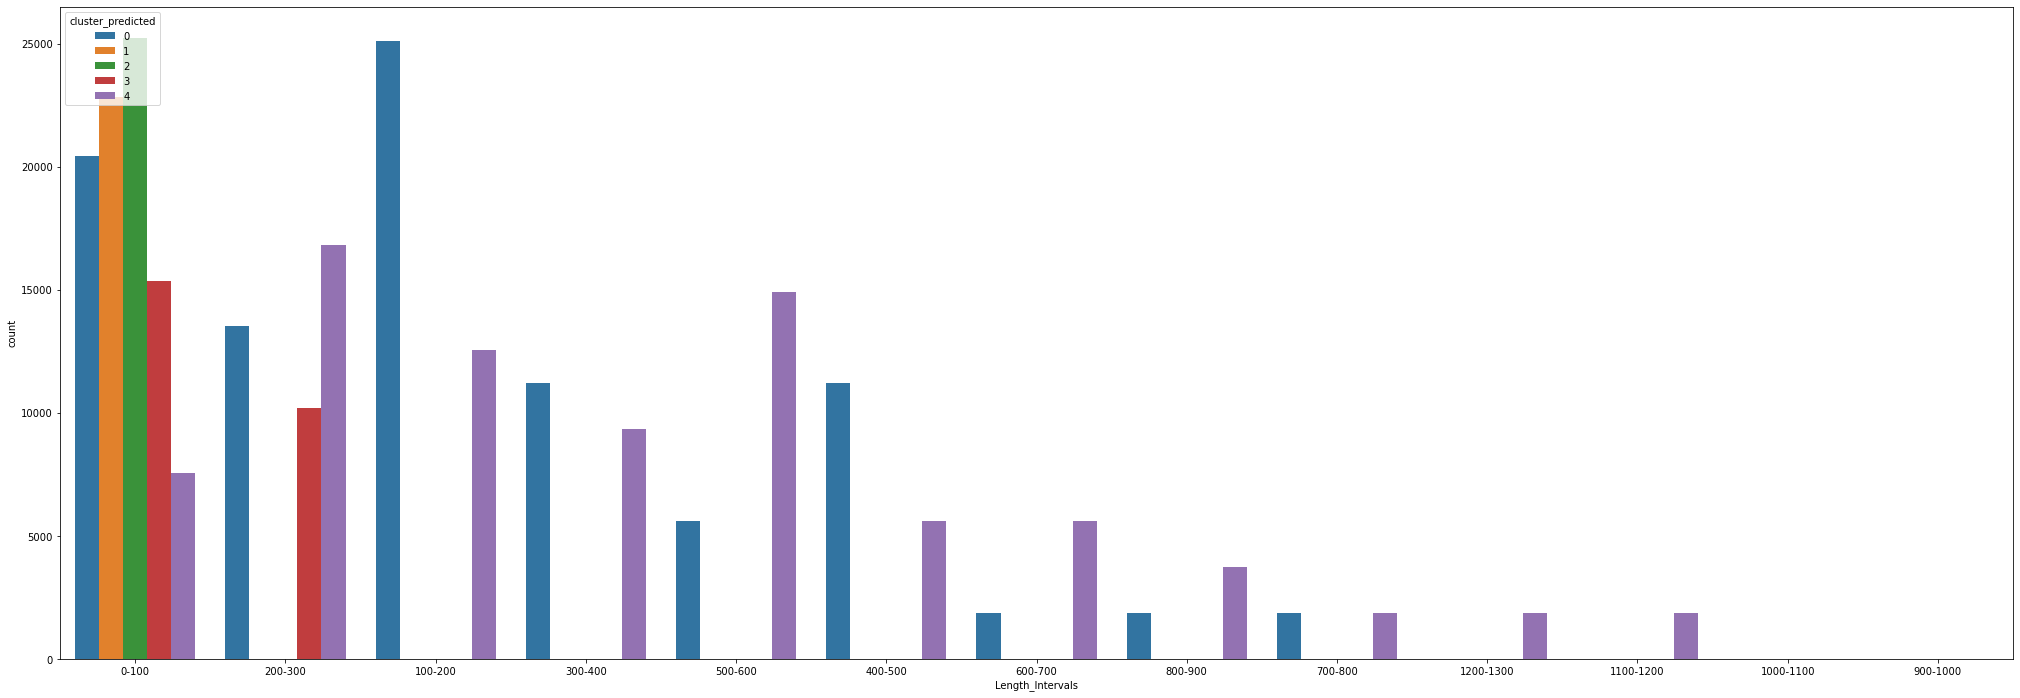

In [78]:
plt.subplots(figsize = (35,12))#(x,y)
sns.countplot(x=combinedDf['Length_Intervals'],order=combinedDf['Length_Intervals'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

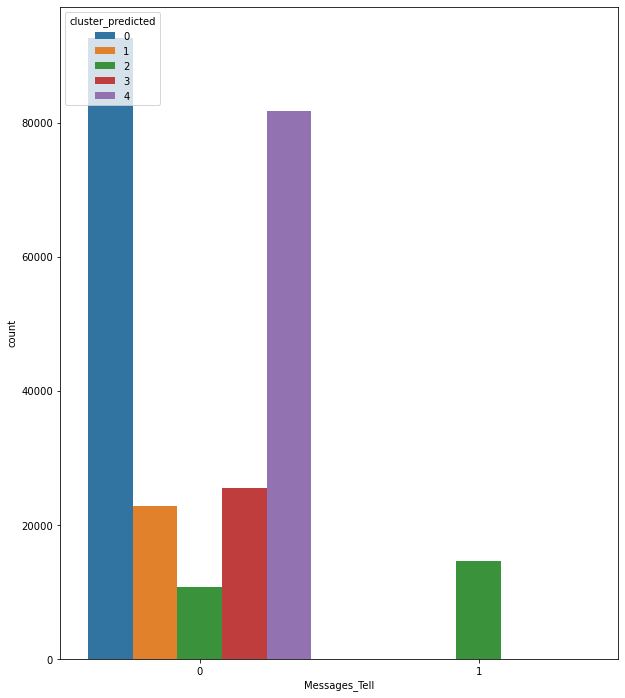

In [96]:
plt.subplots(figsize = (10,12)) #(x,y)
sns.countplot(x=combinedDf['Messages_Tell'],order=combinedDf['Messages_Tell'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

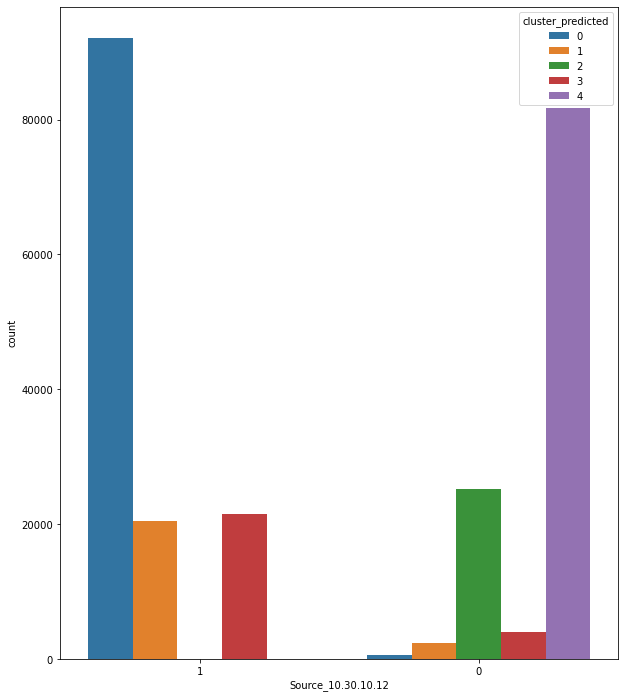

In [97]:
plt.subplots(figsize = (10,12)) #(x,y)
sns.countplot(x=combinedDf['Source_10.30.10.12'],order=combinedDf['Source_10.30.10.12'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

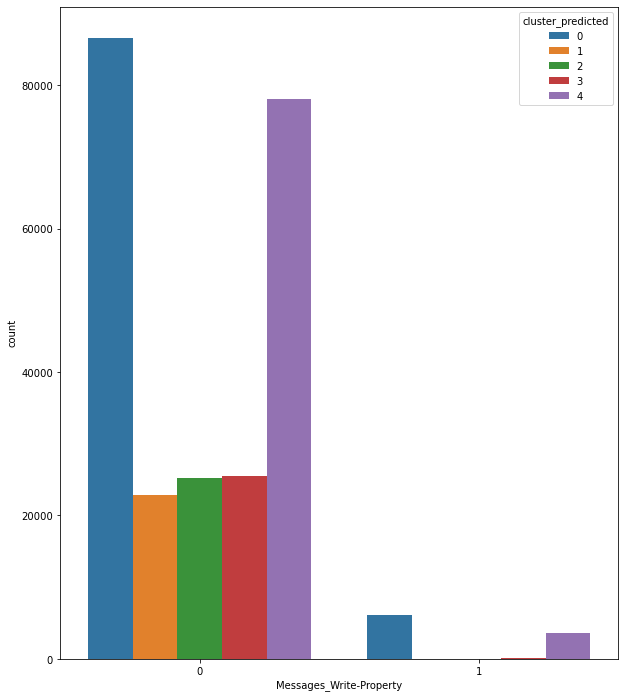

In [98]:
plt.subplots(figsize = (10,12)) #(x,y)
sns.countplot(x=combinedDf['Messages_Write-Property'],order=combinedDf['Messages_Write-Property'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

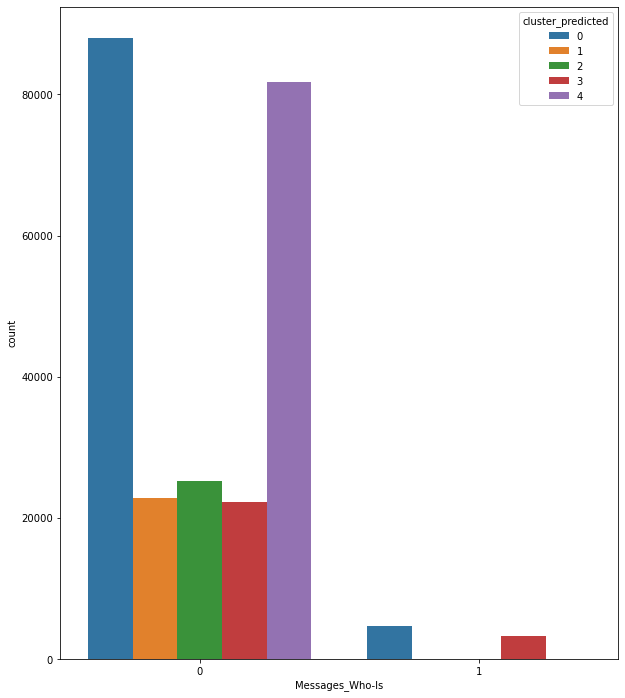

In [99]:
plt.subplots(figsize = (10,12)) #(x,y)
sns.countplot(x=combinedDf['Messages_Who-Is'],order=combinedDf['Messages_Who-Is'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [105]:
f = cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92716 entries, 0 to 248061
Columns: 229 entries, index to cluster_predicted
dtypes: category(2), int64(1), uint16(1), uint8(225)
memory usage: 22.3 MB


In [104]:
f.type()

AttributeError: 'NoneType' object has no attribute 'type'

In [114]:
clustersDf_10 = pd.DataFrame(fitClusters_cao_10)
clustersDf_10.columns = ['cluster_predicted']
combinedDf_10 = pd.concat([Finalized_Data, clustersDf_10], axis = 1).reset_index()
combinedDf_10.drop('index',axis=1)
combinedDf_10.drop('index',axis=1)
combinedDf_10

index  Time_Intervals Length_Intervals  Source_10.10.10.21  \
0            0        (0, 300]          100-200                   0   
1            1        (0, 300]            0-100                   0   
2            2        (0, 300]          200-300                   0   
3            3        (0, 300]          100-200                   0   
4            4        (0, 300]          100-200                   0   
...        ...             ...              ...                 ...   
248063  248063  (12000, 12300]            0-100                   0   
248064  248064  (12000, 12300]            0-100                   0   
248065  248065  (12000, 12300]            0-100                   0   
248066  248066  (12300, 12600]            0-100                   0   
248067  248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248

In [107]:
cluster_0 = combinedDf_10[combinedDf_10['cluster_predicted'] == 0]
cluster_1 = combinedDf_10[combinedDf_10['cluster_predicted'] == 1]
cluster_2 = combinedDf_10[combinedDf_10['cluster_predicted'] == 2]
cluster_3 = combinedDf_10[combinedDf_10['cluster_predicted'] == 3]
cluster_4 = combinedDf_10[combinedDf_10['cluster_predicted'] == 4]


In [108]:
cluster_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73269 entries, 0 to 244039
Columns: 229 entries, index to cluster_predicted
dtypes: category(2), int64(1), uint16(1), uint8(225)
memory usage: 17.7 MB


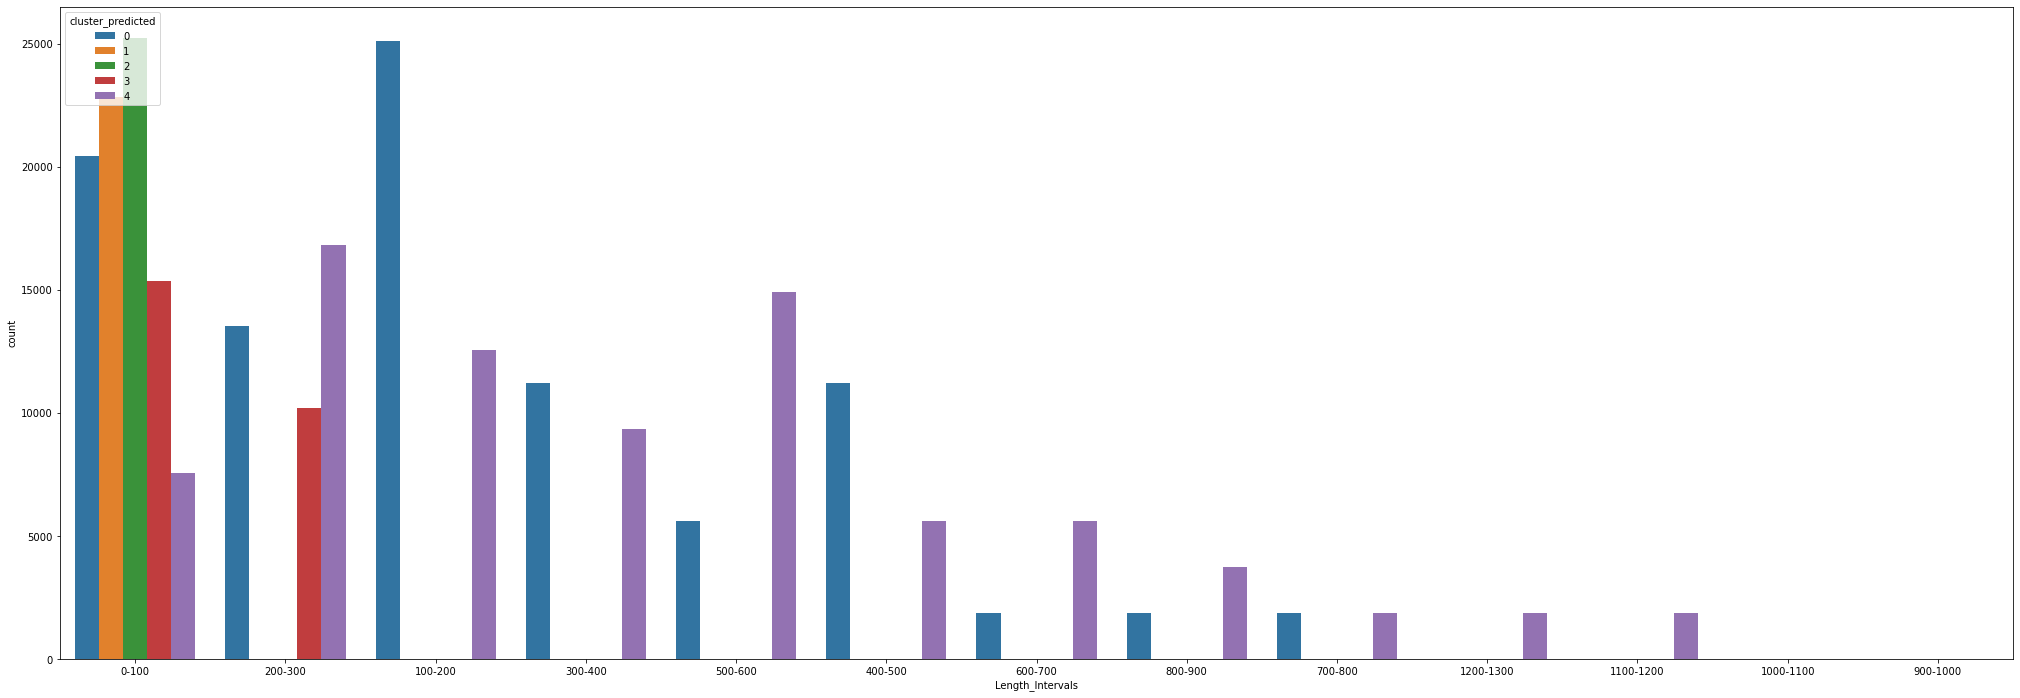

In [128]:
plt.subplots(figsize = (35,12))#(x,y)
sns.countplot(x=combinedDf_10['Length_Intervals'],order=combinedDf_10['Length_Intervals'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

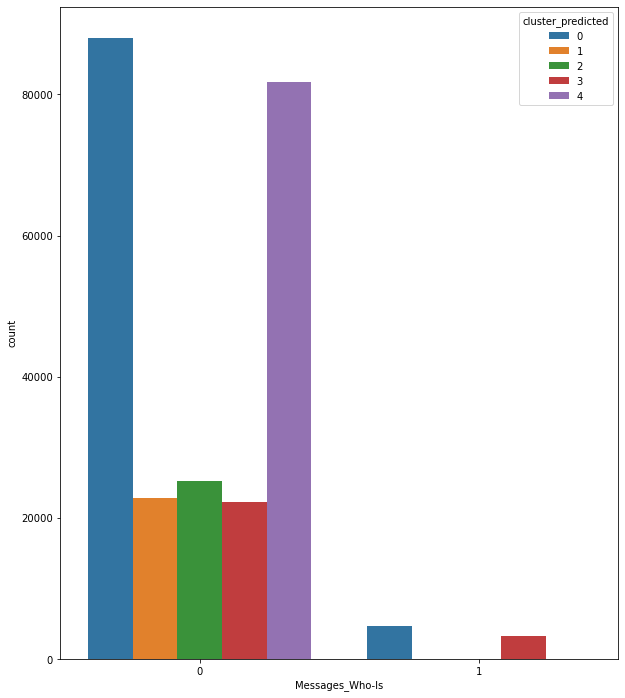

In [118]:
plt.subplots(figsize = (10,12)) #(x,y)
sns.countplot(x=combinedDf_10['Messages_Who-Is'],order=combinedDf_10['Messages_Who-Is'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

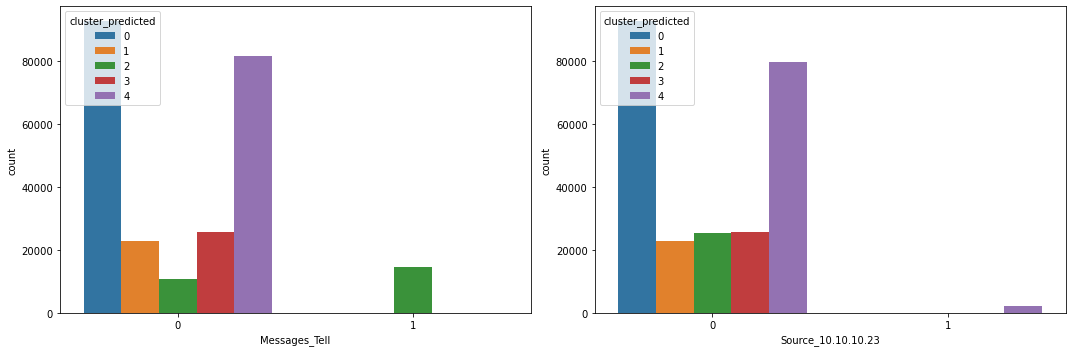

AxesSubplot(0.0589583,0.118628;0.436042x0.851372)


In [133]:
f, axs = plt.subplots(1,2,figsize = (15,5))

sns.countplot(x=combinedDf_10['Messages_Tell'],order=combinedDf_10['Messages_Tell'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf_10['Source_10.10.10.23'],order=combinedDf_10['Source_10.10.10.23'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()
print(axs[0])

In [ ]:
def visualize_data(data_concat, *features, figizex, figsizey):
    
    no = len(features)
    if no == 1:
        plt.subplots(figsize = (figsizex,figsizey)) #(x,y)
        sns.countplot(x=data_concat[feature],order=data_concat[feature].value_counts().index,hue=data_concat['cluster_predicted'])
        plt.show()
    else:
        # Finding the factors for the length of the features
        factors = []
        for i in range(1, no + 1):
            if no % i == 0:
                factors.append(i)
        # Finding the common mulitples that give the length for the subplot        
        axes_vals = []
        for x in factors:
            for j in factors: 
                if x*y = no:
                    axes_vals.append(x)
                    axes_vals.append(y)
                    
        for index,feature in enumerate(features): 
            
            f, axs = plt.subplots(axes_vals[0],axes_vals[1],figsize = (figsizex,figsizey))
            sns.countplot(x=data_concat[feature],order=data_concat[feature].value_counts().index,hue=data_concat['cluster_predicted'],ax=axs[0])
            sns.countplot(x=combinedDf_10['Source_10.10.10.23'],order=combinedDf_10['Source_10.10.10.23'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
        
        plt.tight_layout()
        plt.show()
        

In [120]:
clts = pd.DataFrame(km_cao_10.cluster_centroids_)

In [122]:
clts.columns = Finalized_Data.columns

In [123]:
clts

Time_Intervals Length_Intervals Source_10.10.10.21 Source_10.10.10.23  \
0   (7500, 7800]          100-200                  0                  0   
1   (6900, 7200]            0-100                  0                  0   
2   (2400, 2700]            0-100                  0                  0   
3   (1200, 1500]          200-300                  0                  0   
4   (4200, 4500]            0-100                  0                  0   
5     (300, 600]            0-100                  0                  0   
6   (4500, 4800]            0-100                  0                  0   
7   (1200, 1500]          200-300                  0                  0   
8   (6900, 7200]            0-100                  0                  0   
9   (6900, 7200]            0-100                  0                  0   

  Source_10.10.10.24 Source_10.10.10.43 Source_10.10.10.44 Source_10.10.10.51  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   
9                  0                  0                  0                  0   

  Source_10.10.10.54 Source_10.10.10.61 Source_10.20.10.31 Source_10.30.10.12  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   
5                  0                  0                  0                  1   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  1   
9                  0                  0                  0                  1   

  Source_10.30.10.24 Source_10.30.10.25 Source_10.30.10.31 Source_10.30.10.32  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5                  0                  0                  0                  0   
6                  0                  0                  0                  0   
7                  0                  0                  0                  0   
8                  0                  0                  0                  0   
9                  0                  0                  0                  0   

  Source_10.30.10.33 Source_10.30.10.34 Source_10.30.10.36 Source_10.30.10.37  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   
5             

In [124]:
Finalized_Data

Time_Intervals Length_Intervals  Source_10.10.10.21  \
0             (0, 300]          100-200                   0   
1             (0, 300]            0-100                   0   
2             (0, 300]          200-300                   0   
3             (0, 300]          100-200                   0   
4             (0, 300]          100-200                   0   
...                ...              ...                 ...   
248063  (12000, 12300]            0-100                   0   
248064  (12000, 12300]            0-100                   0   
248065  (12000, 12300]            0-100                   0   
248066  (12300, 12600]            0-100                   0   
248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0  

In [125]:
clts_5 = pd.DataFrame(km_cao.cluster_centroids_)

In [126]:
clts_5.columns = Finalized_Data.columns

In [127]:
clts_5

Time_Intervals Length_Intervals Source_10.10.10.21 Source_10.10.10.23  \
0   (6900, 7200]          100-200                  0                  0   
1   (6900, 7200]            0-100                  0                  0   
2   (2400, 2700]            0-100                  0                  0   
3   (3300, 3600]            0-100                  0                  0   
4   (4200, 4500]          200-300                  0                  0   

  Source_10.10.10.24 Source_10.10.10.43 Source_10.10.10.44 Source_10.10.10.51  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  Source_10.10.10.54 Source_10.10.10.61 Source_10.20.10.31 Source_10.30.10.12  \
0                  0                  0                  0                  1   
1                  0                  0                  0                  1   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

  Source_10.30.10.24 Source_10.30.10.25 Source_10.30.10.31 Source_10.30.10.32  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  Source_10.30.10.33 Source_10.30.10.34 Source_10.30.10.36 Source_10.30.10.37  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  Source_10.30.10.41 Source_10.30.10.42 Source_10.30.10.53 Source_10.30.10.54  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  Source_10.30.10.61 Source_10.30.10.62 Source_10.30.10.71 Source_10.30.10.72  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

  Source_10.30.10.73 Source_10.30.10.81 Source_10.40.10.101  \
0                  0                  0                   0   
1                  0                  0                   0   
2                  0                  0                   0   
3                  0                  0                   0   
4                  0                  0                   0   

  Source_10.40.10.102 Source_10.40.10.21 Source_10.40.10.22  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0  

In [129]:
km_cao_15 = KModes(n_clusters=15, init = "Cao", n_init = 1, verbose=1,random_state=22)
fitClusters_cao_15 = km_cao_15.fit_predict(Finalized_Data)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19064, cost: 625478.0
Run 1, iteration: 2/100, moves: 38921, cost: 618849.0
Run 1, iteration: 3/100, moves: 11004, cost: 614697.0
Run 1, iteration: 4/100, moves: 1356, cost: 614697.0


In [130]:
km_cao_15val = KModes(n_clusters=15, init = "Cao", n_init = 1, verbose=1,random_state=22)
fitClusters_cao_15val = km_cao_15val.fit_predict(Finalized_Data.values)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 19064, cost: 625478.0
Run 1, iteration: 2/100, moves: 38921, cost: 618849.0
Run 1, iteration: 3/100, moves: 11004, cost: 614697.0
Run 1, iteration: 4/100, moves: 1356, cost: 614697.0


In [134]:
clustersDf_15 = pd.DataFrame(fitClusters_cao_15)
clustersDf_15.columns = ['cluster_predicted']
combinedDf_15 = pd.concat([Finalized_Data, clustersDf_15], axis = 1).reset_index()
combinedDf_15.drop('index',axis=1)
combinedDf_15

index  Time_Intervals Length_Intervals  Source_10.10.10.21  \
0            0        (0, 300]          100-200                   0   
1            1        (0, 300]            0-100                   0   
2            2        (0, 300]          200-300                   0   
3            3        (0, 300]          100-200                   0   
4            4        (0, 300]          100-200                   0   
...        ...             ...              ...                 ...   
248063  248063  (12000, 12300]            0-100                   0   
248064  248064  (12000, 12300]            0-100                   0   
248065  248065  (12000, 12300]            0-100                   0   
248066  248066  (12300, 12600]            0-100                   0   
248067  248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248

In [136]:
clts_15 = pd.DataFrame(km_cao_15.cluster_centroids_)
clts_15.columns = Finalized_Data.columns
clts_15

Time_Intervals Length_Intervals Source_10.10.10.21 Source_10.10.10.23  \
0    (6900, 7200]          100-200                  0                  0   
1    (6900, 7200]            0-100                  0                  0   
2    (2400, 2700]            0-100                  0                  0   
3        (0, 300]          200-300                  0                  0   
4    (3900, 4200]          500-600                  0                  0   
5    (7800, 8100]            0-100                  0                  0   
6    (4500, 4800]            0-100                  0                  0   
7    (3600, 3900]          200-300                  0                  0   
8    (4200, 4500]            0-100                  0                  0   
9        (0, 300]            0-100                  0                  0   
10   (7500, 7800]            0-100                  0                  0   
11   (1200, 1500]            0-100                  0                  0   
12   (2100, 2400]            0-100                  0                  0   
13    (900, 1200]            0-100                  0                  0   
14   (1200, 1500]            0-100                  0                  0   

   Source_10.10.10.24 Source_10.10.10.43 Source_10.10.10.44  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  0                  0   
9                   0                  0                  0   
10                  0                  0                  0   
11                  0                  0                  0   
12                  0                  0                  0   
13                  0                  0                  0   
14                  0                  0                  0   

   Source_10.10.10.51 Source_10.10.10.54 Source_10.10.10.61  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  0                  0   
9                   0                  0                  0   
10                  0                  0                  0   
11                  0                  0                  0   
12                  0                  0                  0   
13                  0                  0                  0   
14                  0                  0                  0   

   Source_10.20.10.31 Source_10.30.10.12 Source_10.30.10.24  \
0                   0                  1                  0   
1                   0                  1                  0   
2                   0                  0                  0   
3                   0                  1                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  1                  0   
9                   0                  1                  0   
10                  0                  1                  0   
11          

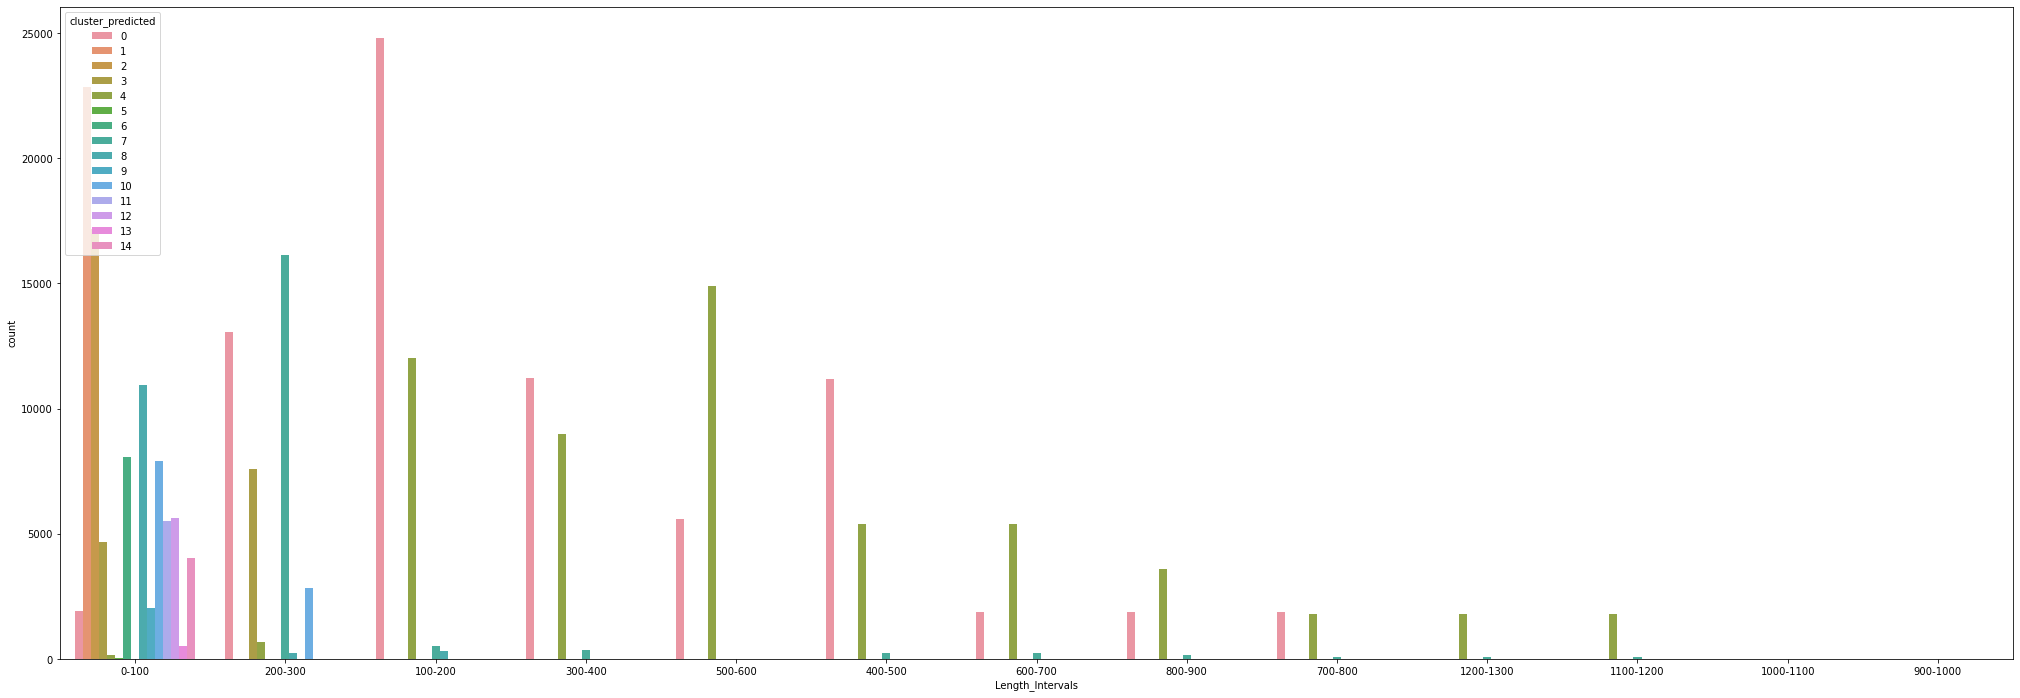

In [137]:
plt.subplots(figsize = (35,12))#(x,y)
sns.countplot(x=combinedDf_15['Length_Intervals'],order=combinedDf_15['Length_Intervals'].value_counts().index,hue=combinedDf_15['cluster_predicted'])
plt.show()

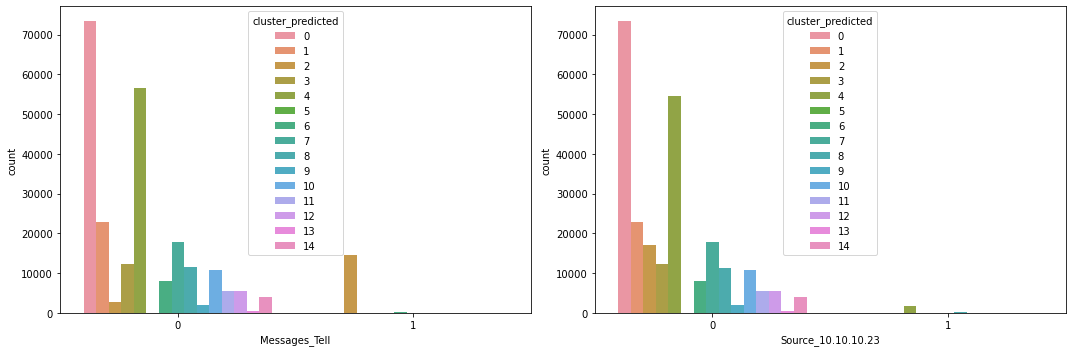

AxesSubplot(0.0589583,0.118628;0.436042x0.851372)


In [175]:
f, axs = plt.subplots(1,2,figsize = (15,5))

sns.countplot(x=combinedDf_15['Messages_Tell'],order=combinedDf_15['Messages_Tell'].value_counts().index,hue=combinedDf_15['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf_15['Source_10.10.10.23'],order=combinedDf_15['Source_10.10.10.23'].value_counts().index,hue=combinedDf_15['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()
print(axs[0])

In [142]:
clustersDf_15val = pd.DataFrame(fitClusters_cao_15val)
clustersDf_15val.columns = ['cluster_predicted']
combinedDf_15val = pd.concat([Finalized_Data, clustersDf_15val], axis = 1).reset_index()
combinedDf_15val.drop('index',axis=1)
combinedDf_15val

index  Time_Intervals Length_Intervals  Source_10.10.10.21  \
0            0        (0, 300]          100-200                   0   
1            1        (0, 300]            0-100                   0   
2            2        (0, 300]          200-300                   0   
3            3        (0, 300]          100-200                   0   
4            4        (0, 300]          100-200                   0   
...        ...             ...              ...                 ...   
248063  248063  (12000, 12300]            0-100                   0   
248064  248064  (12000, 12300]            0-100                   0   
248065  248065  (12000, 12300]            0-100                   0   
248066  248066  (12300, 12600]            0-100                   0   
248067  248067  (12300, 12600]            0-100                   0   

        Source_10.10.10.23  Source_10.10.10.24  Source_10.10.10.43  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.44  Source_10.10.10.51  Source_10.10.10.54  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        1                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.10.10.61  Source_10.20.10.31  Source_10.30.10.12  \
0                        0                   0                   1   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   1   
4                        1                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248065                   0                   0                   0   
248066                   0                   0                   0   
248067                   0                   0                   0   

        Source_10.30.10.24  Source_10.30.10.25  Source_10.30.10.31  \
0                        0                   0                   0   
1                        0                   0                   0   
2                        0                   0                   0   
3                        0                   0                   0   
4                        0                   0                   0   
...                    ...                 ...                 ...   
248063                   0                   0                   0   
248064                   0                   0                   0   
248

In [143]:
clts_15val = pd.DataFrame(km_cao_15val.cluster_centroids_)
clts_15val.columns = Finalized_Data.columns
clts_15val

Time_Intervals Length_Intervals Source_10.10.10.21 Source_10.10.10.23  \
0    (6900, 7200]          100-200                  0                  0   
1    (6900, 7200]            0-100                  0                  0   
2    (2400, 2700]            0-100                  0                  0   
3        (0, 300]          200-300                  0                  0   
4    (3900, 4200]          500-600                  0                  0   
5    (7800, 8100]            0-100                  0                  0   
6    (4500, 4800]            0-100                  0                  0   
7    (3600, 3900]          200-300                  0                  0   
8    (4200, 4500]            0-100                  0                  0   
9        (0, 300]            0-100                  0                  0   
10   (7500, 7800]            0-100                  0                  0   
11   (1200, 1500]            0-100                  0                  0   
12   (2100, 2400]            0-100                  0                  0   
13    (900, 1200]            0-100                  0                  0   
14   (1200, 1500]            0-100                  0                  0   

   Source_10.10.10.24 Source_10.10.10.43 Source_10.10.10.44  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  0                  0   
9                   0                  0                  0   
10                  0                  0                  0   
11                  0                  0                  0   
12                  0                  0                  0   
13                  0                  0                  0   
14                  0                  0                  0   

   Source_10.10.10.51 Source_10.10.10.54 Source_10.10.10.61  \
0                   0                  0                  0   
1                   0                  0                  0   
2                   0                  0                  0   
3                   0                  0                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  0                  0   
9                   0                  0                  0   
10                  0                  0                  0   
11                  0                  0                  0   
12                  0                  0                  0   
13                  0                  0                  0   
14                  0                  0                  0   

   Source_10.20.10.31 Source_10.30.10.12 Source_10.30.10.24  \
0                   0                  1                  0   
1                   0                  1                  0   
2                   0                  0                  0   
3                   0                  1                  0   
4                   0                  0                  0   
5                   0                  0                  0   
6                   0                  0                  0   
7                   0                  0                  0   
8                   0                  1                  0   
9                   0                  1                  0   
10                  0                  1                  0   
11          

In [179]:
no = 2
factors = []
for i in range(1, no + 1):
    if no % i == 0:
        factors.append(i)
        # Finding the common mulitples that give the length for the subplot        
    axes_vals = []
    for x in factors:
        for y in factors:
            if y==1 or x==1 and no!=2:
                continue
            elif x*y == no:
                if len(axes_vals)==2:
                    break
                axes_vals.append(x)
                axes_vals.append(y)
            
                
print(axes_vals)    

[1, 2]


In [180]:
axes_vals[0]


1

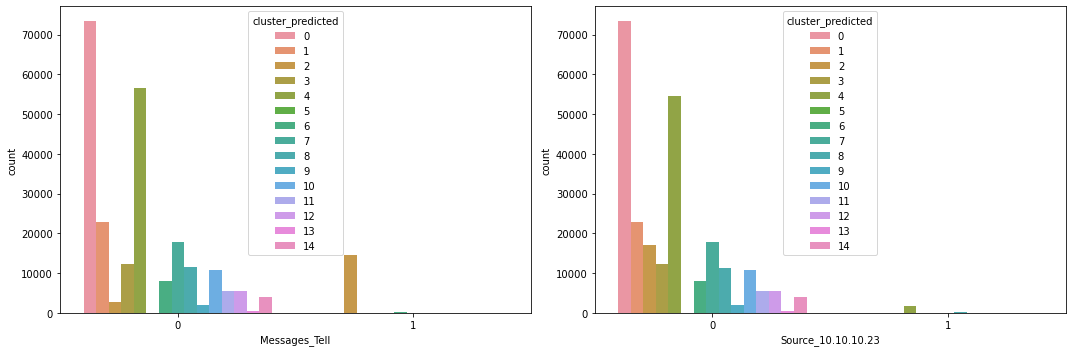

In [181]:
f, axs = plt.subplots(axes_vals[0],axes_vals[1],figsize = (15,5))

sns.countplot(x=combinedDf_15['Messages_Tell'],order=combinedDf_15['Messages_Tell'].value_counts().index,hue=combinedDf_15['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf_15['Source_10.10.10.23'],order=combinedDf_15['Source_10.10.10.23'].value_counts().index,hue=combinedDf_15['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [168]:
axes_vals

[3, 3]